In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer

In [59]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
139,6.9,3.1,5.4,2.1,2.0
2,4.7,3.2,1.3,0.2,0.0
52,6.9,3.1,4.9,1.5,1.0
103,6.3,2.9,5.6,1.8,2.0
142,5.8,2.7,5.1,1.9,2.0
135,7.7,3.0,6.1,2.3,2.0
6,4.6,3.4,1.4,0.3,0.0
67,5.8,2.7,4.1,1.0,1.0
55,5.7,2.8,4.5,1.3,1.0
82,5.8,2.7,3.9,1.2,1.0


In [35]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Splitting test and train set

In [60]:
x = df.iloc[:, :-1]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
y = df.iloc[:, -1]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 4)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [63]:
x_train.shape
x_test.shape

(45, 4)

<Figure size 1080x720 with 0 Axes>

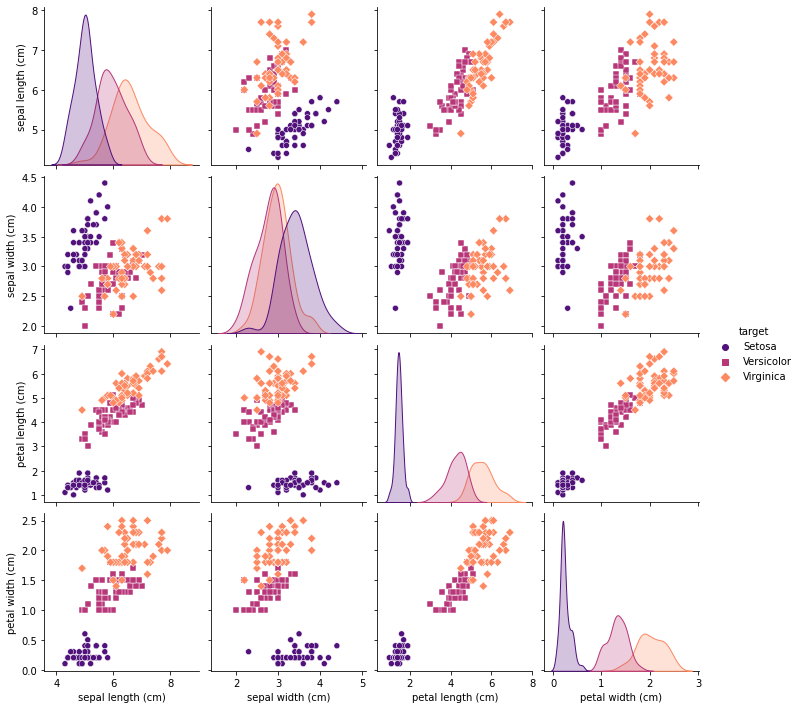

In [122]:
n = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'}
plt.figure(figsize = (15,10))
sns.pairplot(df.replace({'target': n}), hue = "target", markers = ["o", "s", "D"], 
             palette = "magma")
plt.show()

C:\Users\RANDYK~1\AppData\Local\Temp/ipykernel_5580/2386345396.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev = 48, azim = 134)


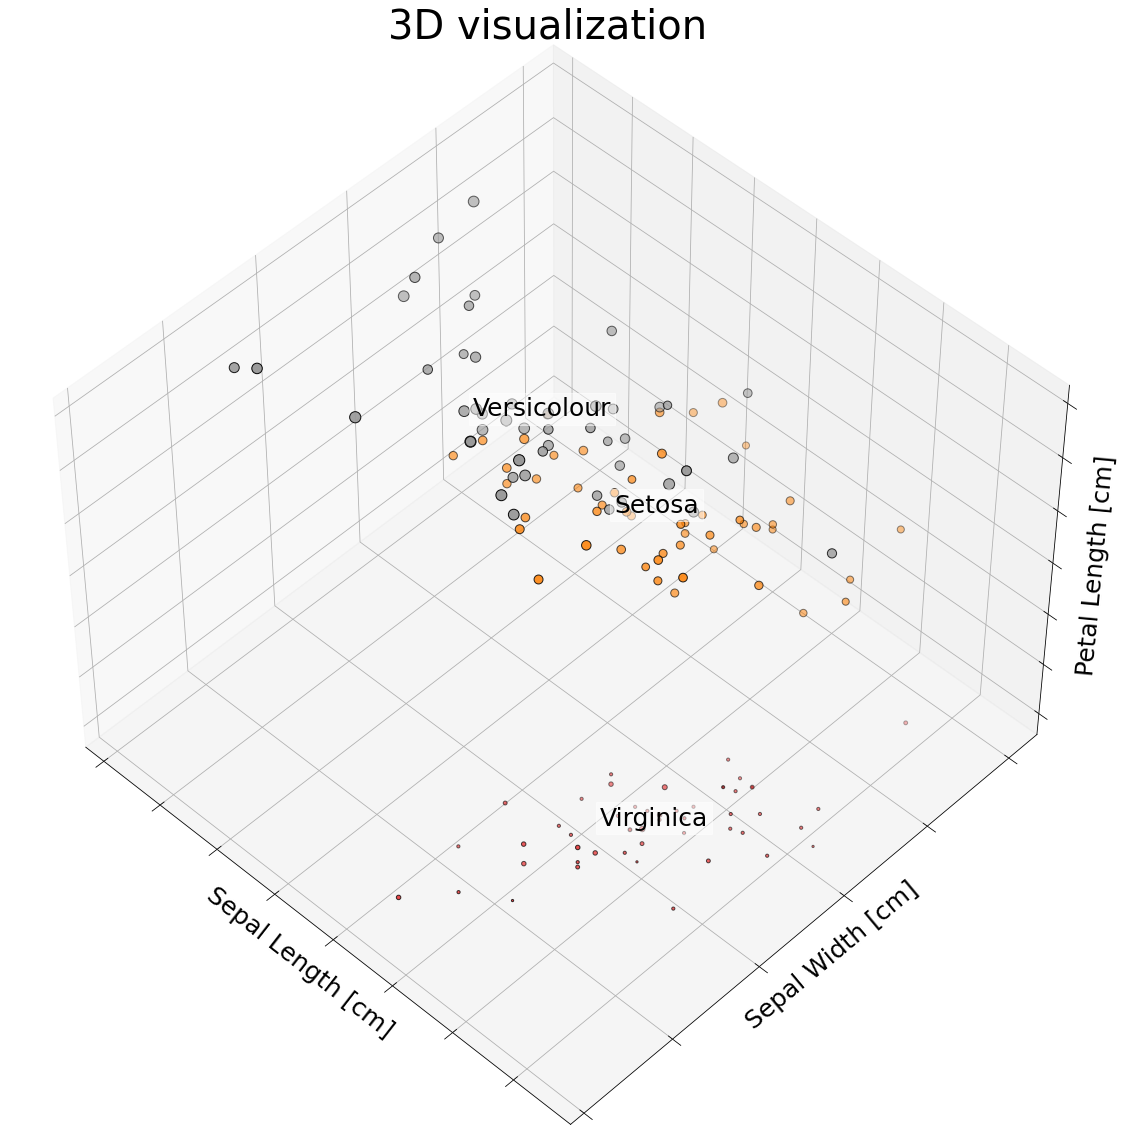

In [88]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

figure = plt.figure(1, figsize = (20, 15))
ax = Axes3D(figure, elev = 48, azim = 134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = y, cmap = plt.cm.Set1, edgecolor = 'k', s = x[:, 3]* 50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean(),
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

### Normalizing train and test set

In [101]:
scaler = Normalizer().fit(x_train)
normalizedx_train = scaler.transform(x_train)
normalizedx_test = scaler.transform(x_test)

In [102]:
x_train[0:10]

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3]])

In [103]:
normalizedx_train[0:10]

array([[0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.73923462, 0.37588201, 0.52623481, 0.187941  ],
       [0.73260391, 0.36029701, 0.55245541, 0.1681386 ],
       [0.70610474, 0.3258945 , 0.59747324, 0.1955367 ],
       [0.80641965, 0.54278246, 0.23262105, 0.03101614],
       [0.76185188, 0.34011245, 0.53057542, 0.14964948],
       [0.70600618, 0.2383917 , 0.63265489, 0.21088496],
       [0.67017484, 0.36168166, 0.59571097, 0.2553047 ],
       [0.75728103, 0.3542121 , 0.52521104, 0.15878473]])

In [104]:
x_test[0:10]

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5]])

In [105]:
normalizedx_test[0:10]

array([[0.69594002, 0.30447376, 0.60894751, 0.22835532],
       [0.8068282 , 0.53788547, 0.24063297, 0.04246464],
       [0.72766159, 0.27533141, 0.59982915, 0.18683203],
       [0.70953708, 0.28008043, 0.61617694, 0.1960563 ],
       [0.71366557, 0.28351098, 0.61590317, 0.17597233],
       [0.73350949, 0.35452959, 0.55013212, 0.18337737],
       [0.70779525, 0.31850786, 0.60162596, 0.1887454 ],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.72366005, 0.32162669, 0.58582004, 0.17230001]])

In [108]:
normalized = pd.DataFrame(data = np.c_[normalizedx_train, y_train], columns = iris['feature_names'] + ['target'])

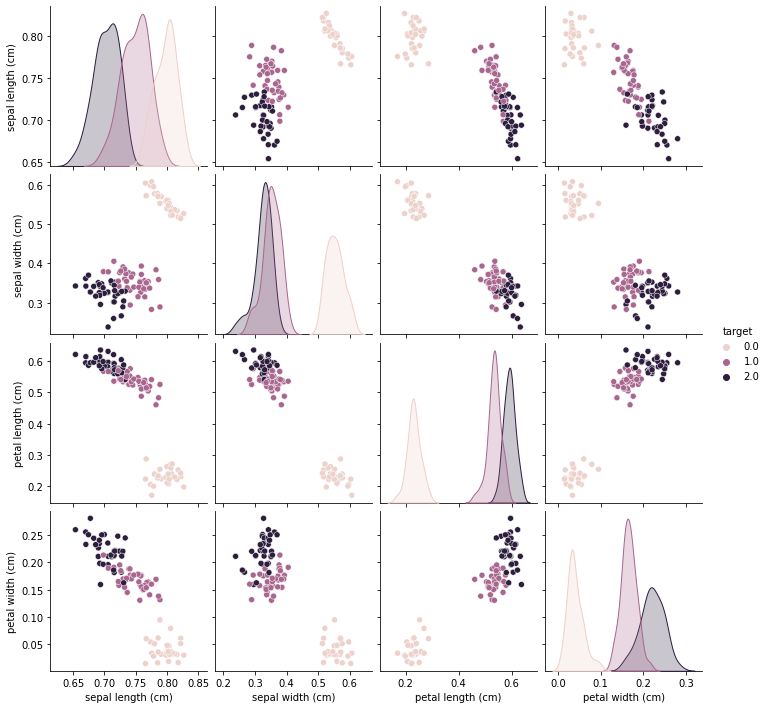

In [109]:
sns.pairplot(normalized, hue = 'target')

### Predictions

In [129]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

**Confusion matrix:**

In [130]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

**Model Accuracy:**

In [133]:
acc = accuracy_score(y_test, y_pred) * 100
round(acc, 2)

97.78

### CV

In [137]:
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(classifier, x_train, y_train, cv = 10, scoring = "accuracy")
    cv_scores.append(scores.mean())
    
cv_scores

[0.9636363636363636,
 0.9727272727272727,
 0.9727272727272727,
 0.9636363636363636,
 0.9627272727272727,
 0.9718181818181819,
 0.9536363636363637,
 0.9718181818181819,
 0.9718181818181819,
 0.9518181818181819,
 0.9427272727272727,
 0.9327272727272728,
 0.9427272727272727,
 0.9327272727272728,
 0.9427272727272727,
 0.9427272727272727,
 0.9327272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9136363636363637,
 0.9136363636363637,
 0.9045454545454547,
 0.8954545454545455,
 0.9045454545454547]

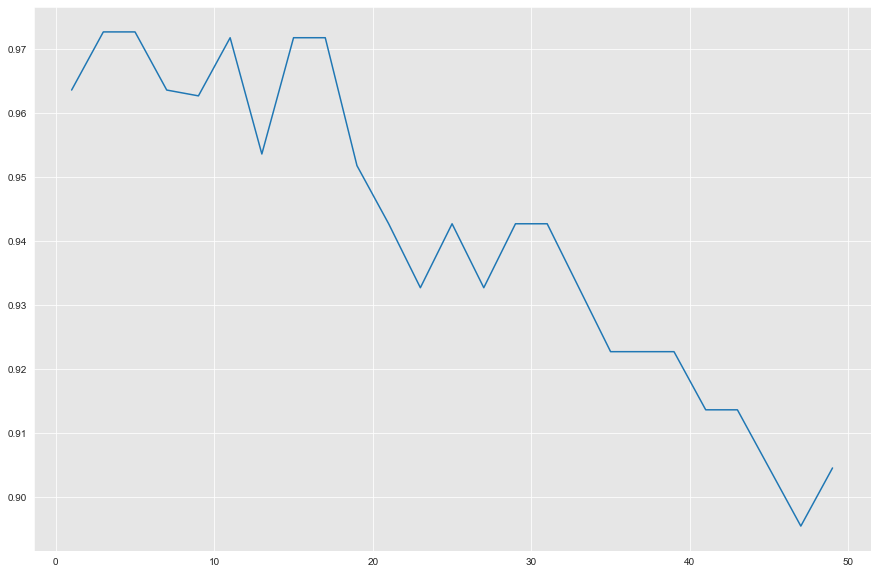

In [148]:
MSE = [x for x in cv_scores]

plt.figure(figsize = (15, 10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.plot(k_list, MSE)
plt.show()